<a href="https://colab.research.google.com/github/prateeksab/housingprices/blob/main/Models_PS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
!git clone https://github.com/prateeksab/housingprices.git
%cd housingprices/Data
%ls

Cloning into 'housingprices'...
remote: Enumerating objects: 108, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (100/100), done.
remote: Total 108 (delta 52), reused 21 (delta 7), pack-reused 0
Receiving objects: 100% (108/108), 9.75 MiB | 11.08 MiB/s, done.
Resolving deltas: 100% (52/52), done.
/content/housingprices/Data/housingprices/Data
Ames_data_8_4_21.csv           AmesHousing_update.csv
Ames_data_8_8_ps.csv           data_description.txt
AmesDummyData_8_4_21.csv       sample_submission.csv
AmesDummyData.csv              test.csv
Ames_dummy_UPDATE_8_10_21.csv  train.csv
AmesHousing.csv                updated_Ames_FE_8_10_21.csv


In [68]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline
sns.set(style='ticks', palette='Set2')

In [69]:
df = pd.read_csv('updated_Ames_FE_8_10_21.csv', index_col=0)
df['remodeled'] = df['remodeled'].astype(int)

In [70]:
print(df.columns)
df = pd.get_dummies(df,drop_first=True)
df.head()
len(df.columns)

Index(['Lot Frontage', 'Lot Area', 'Neighborhood', 'Overall Qual',
       'Overall Cond', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Total Bsmt SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'SalePrice', 'remodeled', 'Age', 'RemodelAge', 'total_other_rooms',
       'outdoorspace', 'reg_lot_shp', 'leveled_land', 'culdsac', '1fam_hm',
       'unf_attic', 'hip_roof', 'premium_ext', 'exclnt_extr',
       'cblock_foundation', 'pconc_foundation', 'other_foundation',
       'exclnt_bsmt', 'bsmt_exosure', 'bsmt_finished', 'bsmt_rec',
       'excellent_heating', 'central_AC', 'kitchen_exclnt', 'fireplace_exclnt',
       'attached_garage', 'finsihed_garage', 'pave_drive', 'normal_sale',
       'vnr_brk'],
      dtype='object')


76

In [104]:
df['Log_SalePrice'] = np.log(df['SalePrice'])
target = 'Log_SalePrice'
remove_features = ['Log_SalePrice','SalePrice']
features = []
# for i in df.columns:
#   if i!='SalePrice':
#     if i!= 'Log_SalePrice':
#       if i!='Neighborhood':
#         features.append(i)

for i in df.columns:
  if i not in remove_features:
    features.append(i)

#features = ['Age','Overall Qual','Lot Frontage','remodeled']
# Selected features are features which were selected post the test of multicollinearity. Features which failed the VIF test were removed
#selected_features = ['Lot Frontage','Lot Area','Mas Vnr Area','BsmtFin SF 1','BsmtFin SF 2','Low Qual Fin SF','Bsmt Full Bath','Half Bath','Fireplaces','remodeled',
#                      'outdoorspace','reg_lot_shp','culdsac','1fam_hm','unf_attic','hip_roof','premium_ext','exclnt_extr',
#                     'exclnt_bsmt','bsmt_exosure','bsmt_finished','bsmt_rec','excellent_heating','kitchen_exclnt','fireplace_exclnt','attached_garage',
#                     'finsihed_garage','normal_sale','vnr_brk']

selected_features_with_neighborhod = ['Lot Frontage','Lot Area','Mas Vnr Area','BsmtFin SF 1','BsmtFin SF 2','Low Qual Fin SF','Bsmt Full Bath','Half Bath','Fireplaces','remodeled','outdoorspace','reg_lot_shp','culdsac','unf_attic','hip_roof','premium_ext','exclnt_extr',
 'exclnt_bsmt','bsmt_exosure','bsmt_finished','bsmt_rec','excellent_heating','kitchen_exclnt','fireplace_exclnt','attached_garage','finsihed_garage','normal_sale',
 'vnr_brk','Neighborhood_Blueste','Neighborhood_BrDale','Neighborhood_BrkSide','Neighborhood_ClearCr','Neighborhood_CollgCr','Neighborhood_Crawfor','Neighborhood_Edwards',
 'Neighborhood_Gilbert','Neighborhood_Greens','Neighborhood_GrnHill','Neighborhood_IDOTRR','Neighborhood_Landmrk','Neighborhood_MeadowV','Neighborhood_Mitchel',
 'Neighborhood_NPkVill','Neighborhood_NWAmes','Neighborhood_NoRidge','Neighborhood_NridgHt','Neighborhood_SWISU','Neighborhood_Sawyer','Neighborhood_SawyerW',
 'Neighborhood_Somerst','Neighborhood_StoneBr','Neighborhood_Timber','Neighborhood_Veenker']

selected_features_with_neighborhod = ['Lot Frontage','Lot Area','Overall Qual','Overall Cond','Mas Vnr Area','BsmtFin SF 1','BsmtFin SF 2','Total Bsmt SF',
 'Low Qual Fin SF','Gr Liv Area','Bsmt Full Bath','Full Bath','Half Bath','Bedroom AbvGr','Kitchen AbvGr','Fireplaces','Garage Yr Blt','Garage Cars','Garage Area','remodeled','Age','RemodelAge','total_other_rooms','outdoorspace',
 'reg_lot_shp','leveled_land','culdsac','1fam_hm','unf_attic','hip_roof','premium_ext','exclnt_extr','exclnt_bsmt','bsmt_exosure','bsmt_finished','bsmt_rec','excellent_heating',
 'central_AC','kitchen_exclnt','fireplace_exclnt','attached_garage','finsihed_garage','pave_drive','normal_sale','vnr_brk','Neighborhood_Blueste','Neighborhood_BrDale','Neighborhood_BrkSide','Neighborhood_ClearCr',
 'Neighborhood_Crawfor','Neighborhood_Gilbert','Neighborhood_Greens','Neighborhood_GrnHill','Neighborhood_IDOTRR','Neighborhood_Landmrk','Neighborhood_MeadowV','Neighborhood_Mitchel','Neighborhood_NPkVill',
 'Neighborhood_NWAmes', 'Neighborhood_NoRidge','Neighborhood_NridgHt','Neighborhood_SWISU', 'Neighborhood_Sawyer','Neighborhood_SawyerW','Neighborhood_Somerst', 'Neighborhood_StoneBr',
 'Neighborhood_Timber', 'Neighborhood_Veenker']

selected_features_with_neighborhod= ['Lot Frontage','Lot Area','Mas Vnr Area',
 'BsmtFin SF 1','BsmtFin SF 2','Low Qual Fin SF','Bsmt Full Bath','Half Bath','Fireplaces','remodeled','RemodelAge','outdoorspace','reg_lot_shp','culdsac','unf_attic','hip_roof','premium_ext','exclnt_extr',
 'exclnt_bsmt','bsmt_exosure','bsmt_finished','bsmt_rec','excellent_heating','kitchen_exclnt','fireplace_exclnt','attached_garage','finsihed_garage','normal_sale',
  'vnr_brk','Neighborhood_Blueste','Neighborhood_BrDale','Neighborhood_BrkSide','Neighborhood_ClearCr','Neighborhood_Crawfor',
 'Neighborhood_Gilbert','Neighborhood_Greens','Neighborhood_GrnHill','Neighborhood_IDOTRR','Neighborhood_Landmrk','Neighborhood_MeadowV','Neighborhood_Mitchel','Neighborhood_NPkVill','Neighborhood_NWAmes',
 'Neighborhood_NoRidge','Neighborhood_NridgHt','Neighborhood_SWISU','Neighborhood_Sawyer','Neighborhood_SawyerW','Neighborhood_Somerst','Neighborhood_StoneBr','Neighborhood_Timber','Neighborhood_Veenker']
features = selected_features_with_neighborhod
#features

In [105]:
# assigning X & Y to features and target
X = df[features]
Y = df[target]

# Split the data into train and test pieces for both X and Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [106]:
# Linear regression
linear_regression_model = LinearRegression()
linear_regression_model.fit(X=X_train,y=Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [107]:
# Cross validation
scores = cross_val_score(linear_regression_model, X_train, Y_train,  cv=10)
print ("Cross Validated Accuracy: %0.3f +/- %0.3f" % (scores.mean(), scores.std()))

Cross Validated Accuracy: 0.761 +/- 0.053


In [108]:
Y_Pred = linear_regression_model.predict(X_test)

In [109]:
print("Root mean square: ",np.mean((Y_Pred - Y_test)**2))
sales_pred = np.exp(Y_Pred)
sales_test = np.exp(Y_test)
print("Root mean square: ",np.sqrt(np.mean((sales_pred - sales_test)**2)))

Root mean square:  0.037331114840744986
Root mean square:  35797.09420221901


In [110]:
mean_squared_error(y_true = Y_test,y_pred=Y_Pred)
mean_squared_error(y_true = sales_test,y_pred=sales_pred)

1281431953.3225415

In [111]:
# Using stats models
sm_model = sm.OLS(endog=Y_train,exog=X_train.astype(float)).fit()
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Log_SalePrice   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              1805.
Date:                Fri, 13 Aug 2021   Prob (F-statistic):                        0.00
Time:                        16:38:45   Log-Likelihood:                         -4405.4
No. Observations:                2197   AIC:                                      8915.
Df Residuals:                    2145   BIC:                                      9211.
Df Model:                          52                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Lot Frontage             0.0172      0.001     13.540      0.000       0.015       0.020
Lot Area              5.468e-05   6.02e-06      9.077      0.000    4.29e-05    6.65e-05
Mas Vnr Area            -0.0006      0.000     -2.033      0.042      -0.001   -2.23e-05
BsmtFin SF 1             0.0001      0.000      0.920      0.358      -0.000       0.000
BsmtFin SF 2             0.0002      0.000      0.730      0.465      -0.000       0.001
Low Qual Fin SF          0.0015      0.001      1.790      0.074      -0.000       0.003
Bsmt Full Bath           0.1263      0.106      1.195      0.232      -0.081       0.334
Half Bath                0.3599      0.088      4.089      0.000       0.187       0.533
Fireplaces              -0.1904      0.084     -2.272      0.023      -0.355      -0.026
remodeled                1.3880      0.089     15.653      0.000       1.214       1.562
RemodelAge               0.0783      0.002     32.733      0.000       0.074       0.083
outdoorspace             1.3931      0.109     12.727      0.000       1.178       1.608
reg_lot_shp              1.2012      0.094     12.764      0.000       1.017       1.386
culdsac                  1.1099      0.186      5.969      0.000       0.745       1.475
unf_attic                0.0746      0.334      0.224      0.823      -0.580       0.729
hip_roof                 0.3674      0.110      3.341      0.001       0.152       0.583
premium_ext              0.8991      0.103      8.740      0.000       0.697       1.101
exclnt_extr              0.4481      0.143      3.135      0.002       0.168       0.728
exclnt_bsmt              0.8456      0.125      6.777      0.000       0.601       1.090
bsmt_exosure             0.3020      0.109      2.778      0.006       0.089       0.515
bsmt_finished            0.5039      0.115      4.382      0.000       0.278       0.729
bsmt_rec                 0.6215      0.145      4.295      0.000       0.338       0.905
excellent_heating        0.9605      0.100      9.614      0.000       0.765       1.156
kitchen_exclnt           0.8186      0.123      6.658      0.000       0.577       1.060
fireplace_exclnt         0.0677      0.119      0.571      0.568      -0.165       0.300
attached_garage          1.1143      0.118      9.424      0.000       0.882       1.346
finsihed_garage         -0.0853      0.117     -0.732      0.464      -0.314       0.143
normal_sale              2.0294      0.100     20.325      0.000       1.834       2.225
vnr_brk                  0.3930      0.114      3.456      0.001       0.170       0.616
Neighborhood_Blueste     1.9702      0.622      3.169      0.002       0.751       3.190
Neighborhood_BrDale      3.1265      0.446     

# New Section

In [112]:
in_sample_r2 = linear_regression_model.score(X=X_train,y=Y_train)
print("In Sample R2: %0.3f" % (in_sample_r2))
out_of_sample_r2 = linear_regression_model.score(X=X_test,y=Y_test)
print("Out Of Sample R2: %0.3f" % out_of_sample_r2)

In Sample R2: 0.775
Out Of Sample R2: 0.780


In [113]:
# Calculating residuals
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results


in_sample_residuals = calculate_residuals(linear_regression_model,X_train,Y_train)
out_sample_residuals = calculate_residuals(linear_regression_model,X_test,Y_test)



# Testing assumptions

# Linearity


Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


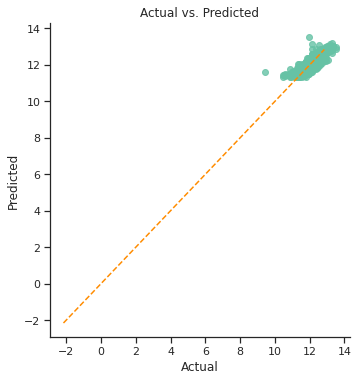

None
Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


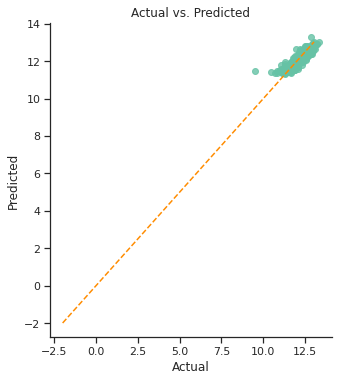

None


In [114]:
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=5)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

in_sample_linearity = linear_assumption(linear_regression_model,X_train,Y_train)
print(in_sample_linearity)
out_sample_linearity = linear_assumption(linear_regression_model,X_test,Y_test)
print(out_sample_linearity)

# Testing Normality of residuals

In [115]:
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')



Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


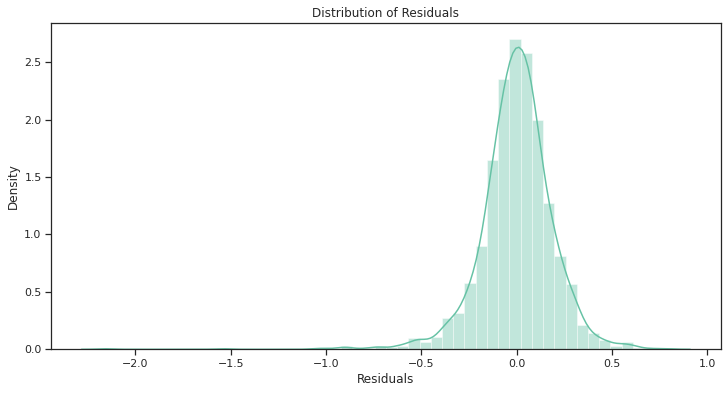


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 1.4683977766732136e-15
Residuals are not normally distributed


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


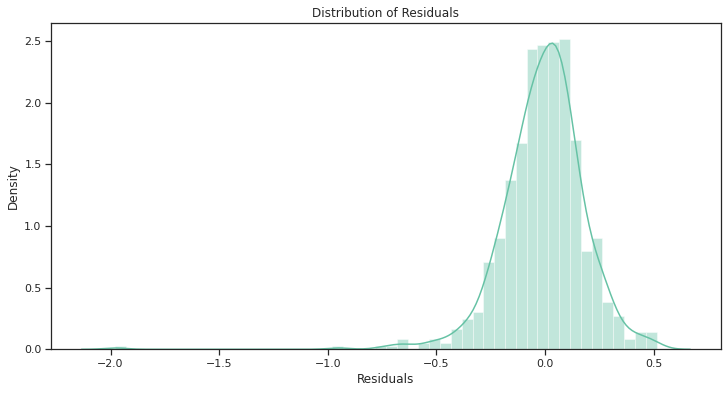


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [116]:
in_sample_normality_errors = normal_errors_assumption(linear_regression_model,X_train,Y_train)
out_sample_normality_errors = normal_errors_assumption(linear_regression_model,X_test,Y_test)

# Multicollinearity assumption

In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def multicollinearity_assumption(model, features, label, feature_names=None):
    """
    Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                       correlation among the predictors, then either remove prepdictors with high
                       Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           
                       This assumption being violated causes issues with interpretability of the 
                       coefficients and the standard errors of the coefficients.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('Assumption 3: Little to no multicollinearity among predictors')
        
    # Plotting the heatmap
    plt.figure(figsize = (40,40))
    feature_names = features.columns
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
    plt.title('Correlation of Variables')
    plt.show()
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')
       
    # Gathering the VIF for each variable
    VIF = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))
        
    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')

Assumption 3: Little to no multicollinearity among predictors


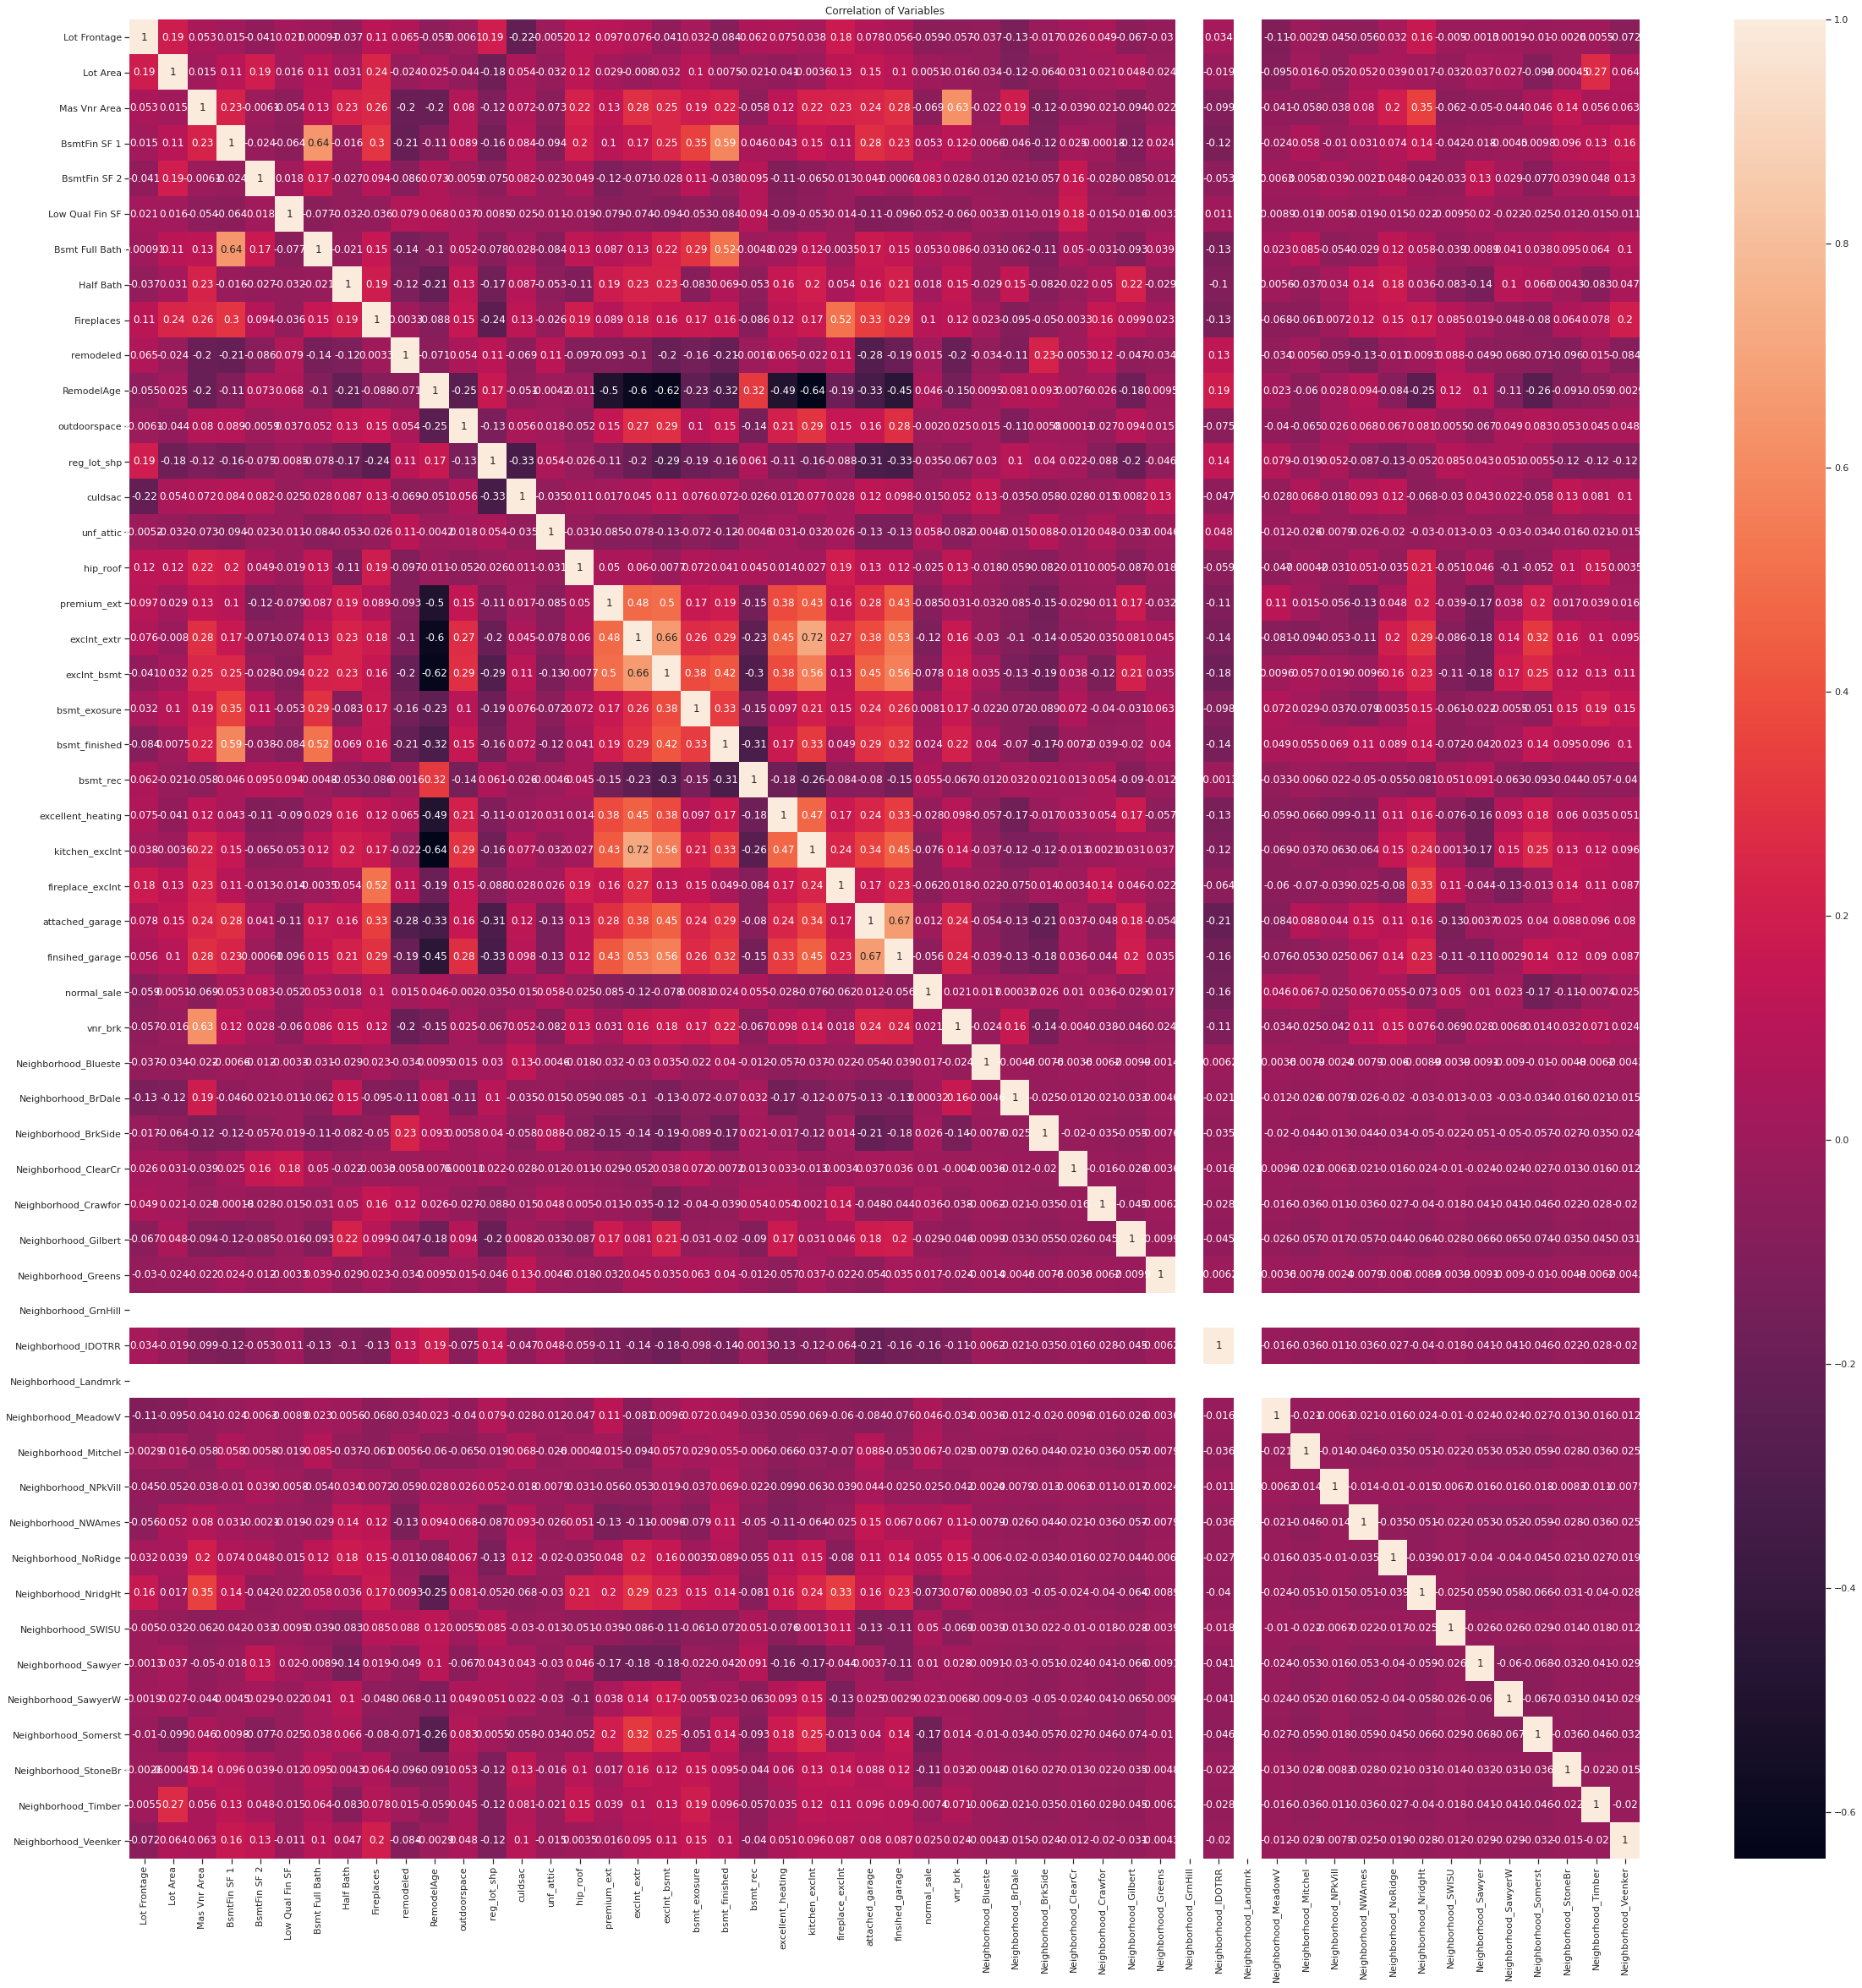

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
Lot Frontage: 5.022782345788063
Lot Area: 2.979609722377183
Mas Vnr Area: 3.2797256684292395
BsmtFin SF 1: 5.428870370412251
BsmtFin SF 2: 1.4129887967456725
Low Qual Fin SF: 1.1024872863387953
Bsmt Full Bath: 3.577004266345122
Half Bath: 2.3155305778466917
Fireplaces: 3.7434167257883546
remodeled: 2.4420140287436403
RemodelAge: 4.201875198740176
outdoorspace: 7.841338234742683
reg_lot_shp: 3.5806023808764986
culdsac: 1.3705050600891098
unf_attic: 1.0846771301010878
hip_roof: 1.55632062512671
premium_ext: 3.0949288297475106
exclnt_extr: 5.495876188412962
exclnt_bsmt: 6.616613405920118
bsmt_exosure: 2.05316731800707
bsmt_finished: 4.4935995005929845
bsmt_rec: 1.5671250248563628
excellent_heating: 5.209242483188413
kitchen_exclnt: 5.326114837071561
fireplace_exclnt: 2.5442469301478647
attached_garage: 7.35266

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [118]:
in_sample_multicollinearity = multicollinearity_assumption(linear_regression_model,X_test,Y_test)

In [119]:
X_train.values

array([[6.6000e+01, 8.3000e+03, 8.6000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [8.5000e+01, 1.4082e+04, 9.4500e+02, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [6.5000e+01, 1.4006e+04, 1.4400e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [8.2000e+01, 9.4880e+03, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [7.8000e+01, 1.7503e+04, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [5.0000e+01, 5.9250e+03, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [120]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values,i) for i in range(len(X_train.columns))]
x = [variance_inflation_factor(X_train.values,i) for i in range(len(X_train.columns))]
x

[4.832375278243661,
 3.84892911433857,
 2.8973997792255446,
 5.199427847321739,
 1.3007975264678588,
 1.080501734634728,
 3.380923507829263,
 2.0113641422974284,
 3.630261106052523,
 2.4384644672096045,
 4.256479385215811,
 6.583707643000118,
 3.787275012290447,
 1.3166595959839804,
 1.0780654936954406,
 1.5094682285669296,
 2.949060437440132,
 4.945413758838894,
 5.147640978152729,
 1.8431165089231112,
 3.7842897622737977,
 1.3481563886329313,
 4.390200522153835,
 4.58276800632402,
 2.5078685996411796,
 6.135657405791258,
 4.7267909372342105,
 5.466024729121546,
 2.6652303542918045,
 1.0517668154737616,
 1.1418571304783263,
 1.2306051230637003,
 1.248905326270453,
 1.2274496520788833,
 1.4819901261965696,
 1.1047262160758562,
 1.0191064358209814,
 1.1961974831640751,
 1.0145604584876726,
 1.1646331469460418,
 1.1560140011110285,
 1.1523675751884699,
 1.291109848355994,
 1.3591314057607948,
 1.7537935954576453,
 1.140013129732347,
 1.1591431181261476,
 1.2202362506842377,
 1.5204454129

In [121]:
vif_data['Acceptable'] = vif_data['VIF'].apply(lambda x: 1 if x<10 else 0)
vif_data.sort_values(by='Acceptable',ascending=True)
features_to_remove = vif_data[vif_data['Acceptable'] == 0]['feature']

features_to_remove.values
#vif_data.head(68)

array([], dtype=object)

In [122]:
# new_features were posted as selected_features
new_features = features
for element in features_to_remove:
  if element in new_features:
    new_features.remove(element)
len(new_features)

52

In [123]:
# Preditction function

X_train.head()
#data_record = X_train.loc[197:199]
#print(data_record)
#linear_regression_model.predict(data_record)

,Lot Frontage,Lot Area,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Low Qual Fin SF,Bsmt Full Bath,Half Bath,Fireplaces,remodeled,RemodelAge,outdoorspace,reg_lot_shp,culdsac,unf_attic,hip_roof,premium_ext,exclnt_extr,exclnt_bsmt,bsmt_exosure,bsmt_finished,bsmt_rec,excellent_heating,kitchen_exclnt,fireplace_exclnt,attached_garage,finsihed_garage,normal_sale,vnr_brk,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_Crawfor,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
1954,66.0,8300,86.0,952.0,0.0,0,1.0,0,0,0,42,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1641,85.0,14082,945.0,1558.0,0.0,0,1.0,1,1,0,4,1,0,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2779,65.0,14006,144.0,0.0,0.0,0,0.0,1,1,0,8,1,0,0,0,0,1,1,1,0,0,0,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1452,60.0,7200,0.0,632.0,0.0,0,0.0,0,0,0,38,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1230,75.0,7875,136.0,572.0,0.0,0,1.0,0,0,0,49,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [124]:
sorted_test_data = X_test.sort_index()
sorted_test_data

,Lot Frontage,Lot Area,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Low Qual Fin SF,Bsmt Full Bath,Half Bath,Fireplaces,remodeled,RemodelAge,outdoorspace,reg_lot_shp,culdsac,unf_attic,hip_roof,premium_ext,exclnt_extr,exclnt_bsmt,bsmt_exosure,bsmt_finished,bsmt_rec,excellent_heating,kitchen_exclnt,fireplace_exclnt,attached_garage,finsihed_garage,normal_sale,vnr_brk,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_Crawfor,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,141.0,31770,112.0,639.0,0.0,0,1.0,0,2,0,50,1,0,0,0,1,1,0,0,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,93.0,11160,0.0,1065.0,0.0,0,1.0,1,2,0,42,0,1,0,0,1,1,1,0,0,1,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,78.0,9978,20.0,602.0,0.0,0,0.0,1,1,0,12,1,0,0,0,0,1,0,0,0,1,0,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,75.0,10000,0.0,0.0,0.0,0,0.0,1,1,1,16,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,63.0,8402,0.0,0.0,0.0,0,0.0,1,1,0,12,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906,32.0,4500,443.0,1201.0,0.0,0,1.0,0,0,0,12,1,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2913,21.0,1470,0.0,522.0,0.0,0,1.0,0,0,0,40,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2918,21.0,1526,0.0,0.0,0.0,0,0.0,1,0,0,40,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2921,55.0,12640,0.0,936.0,396.0,0,0.0,0,0,0,34,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [132]:
#sorted_test_data['Predicted_HousePrice_BaseCase'] = np.exp(linear_regression_model.predict(sorted_test_data))
df_Y_test = pd.DataFrame(Y_test)
df_Y_test['Actual_HousePrice'] = df_Y_test['Log_SalePrice'].apply(lambda x: np.exp(x))
df_Y_test['Predicted_HousePrice'] = np.exp(linear_regression_model.predict(X_test))

In [133]:
merged_df = pd.merge(sorted_test_data,df_Y_test,left_on=sorted_test_data.index,right_on=df_Y_test.index,how='inner')
merged_df.head()

,key_0,Lot Frontage,Lot Area,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Low Qual Fin SF,Bsmt Full Bath,Half Bath,Fireplaces,remodeled,RemodelAge,outdoorspace,reg_lot_shp,culdsac,unf_attic,hip_roof,premium_ext,exclnt_extr,exclnt_bsmt,bsmt_exosure,bsmt_finished,bsmt_rec,excellent_heating,kitchen_exclnt,fireplace_exclnt,attached_garage,finsihed_garage,normal_sale,vnr_brk,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_Crawfor,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Log_SalePrice,Actual_HousePrice,Predicted_HousePrice
0,0,141.0,31770,112.0,639.0,0.0,0,1.0,0,2,0,50,1,0,0,0,1,1,0,0,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.278393,215000.0,203667.248864
1,3,93.0,11160,0.0,1065.0,0.0,0,1.0,1,2,0,42,0,1,0,0,1,1,1,0,0,1,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.404924,244000.0,219551.046870
2,5,78.0,9978,20.0,602.0,0.0,0,0.0,1,1,0,12,1,0,0,0,0,1,0,0,0,1,0,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.183316,195500.0,203628.746252
3,10,75.0,10000,0.0,0.0,0.0,0,0.0,1,1,1,16,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.077671,175900.0,160660.792368
4,12,63.0,8402,0.0,0.0,0.0,0,0.0,1,1,0,12,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.102932,180400.0,180583.860088


In [134]:
# from google.colab import files
# merged_df.to_csv("data.csv")
# files.download("data.csv")

In [135]:

subset_df = merged_df.head(20)
subset_df['kitchen_exclnt'] = 1
subset_df['Predicted_HousePrice_kitchen_exclnt'] = np.exp(linear_regression_model.predict(subset_df[features]))               
subset_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,key_0,Lot Frontage,Lot Area,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Low Qual Fin SF,Bsmt Full Bath,Half Bath,Fireplaces,remodeled,RemodelAge,outdoorspace,reg_lot_shp,culdsac,unf_attic,hip_roof,premium_ext,exclnt_extr,exclnt_bsmt,bsmt_exosure,bsmt_finished,bsmt_rec,excellent_heating,kitchen_exclnt,fireplace_exclnt,attached_garage,finsihed_garage,normal_sale,vnr_brk,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_Crawfor,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Log_SalePrice,Actual_HousePrice,Predicted_HousePrice,Predicted_HousePrice_kitchen_exclnt
0,0,141.0,31770,112.0,639.0,0.0,0,1.0,0,2,0,50,1,0,0,0,1,1,0,0,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.278393,215000.0,203667.248864,218959.179771
1,3,93.0,11160,0.0,1065.0,0.0,0,1.0,1,2,0,42,0,1,0,0,1,1,1,0,0,1,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.404924,244000.0,219551.046870,219551.046870
2,5,78.0,9978,20.0,602.0,0.0,0,0.0,1,1,0,12,1,0,0,0,0,1,0,0,0,1,0,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.183316,195500.0,203628.746252,203628.746252
3,10,75.0,10000,0.0,0.0,0.0,0,0.0,1,1,1,16,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.077671,175900.0,160660.792368,172723.673121
4,12,63.0,8402,0.0,0.0,0.0,0,0.0,1,1,0,12,1,0,0,0,0,1,0,1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.102932,180400.0,180583.860088,194142.622859
5,13,85.0,10176,0.0,637.0,0.0,0,1.0,1,1,0,20,1,1,0,0,0,0,0,1,1,1,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.052339,171500.0,189977.222845,189977.222845
6,14,0.0,6820,0.0,368.0,1120.0,0,1.0,1,0,0,25,1,0,0,0,0,0,1,1,1,1,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,12.264342,212000.0,245462.079145,245462.079145
7,16,152.0,12134,0.0,427.0,0.0,0,0.0,0,0,1,5,1,0,0,0,0,0,1,1,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.007622,164000.0,172476.626880,185426.674942
8,20,105.0,11751,480.0,705.0,0.0,0,0.0,0,1,0,33,1,0,0,0,1,0,0,1,0,0,0,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,12.154779,190000.0,203792.725497,219094.077555
9,29,21.0,1680,504.0,156.0,0.0,0,0.0,1,0,0,39,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.472103,96000.0,107501.143162,115572.642447


In [63]:
np.exp(0.39)

1.4769807938826427